## Transformación Gaussiana con Feature-Engine

## En este demo

Implementaremos las transformaciones utlizando Feature-Engine y el conjunto de datos del House Prices.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from feature_engine import variable_transformers as vt

In [2]:
data = pd.read_csv('../houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Gráfica para evaluar normalidad

Para visualizar la distribución de la variables, graficamos un histograma o una gráfica Q-Q. En las gráficas Q-Q, si la variable está normalmente distribuida, los valores de la variable deben caer en una línea a 45 grados cuando se grafican en contra de los cuantiles teóricos.  Esto lo discutimos previamente en la Sección 3 del curso.

In [3]:
# graficar los histogramas para evaluar rápidamente
# la distribución de las variables

# histogram y gráficos Q-Q 

def diagnostic_plots(df, variable):
    
   # función para graficar un histograma y gráfica Q-Q 
    # por cada variable

    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

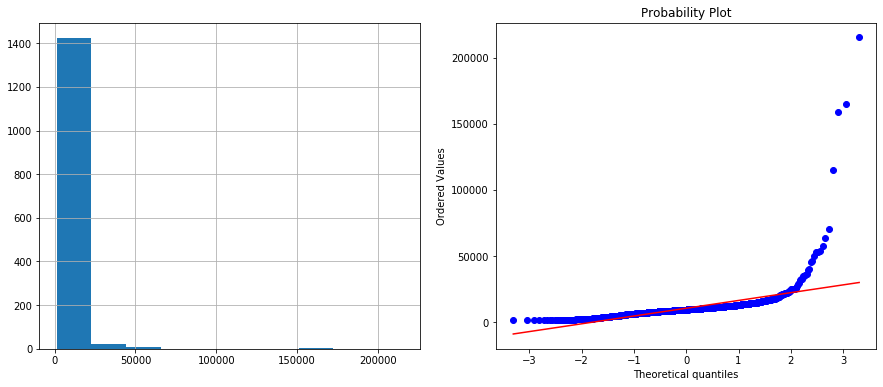

In [4]:
diagnostic_plots(data, 'LotArea')

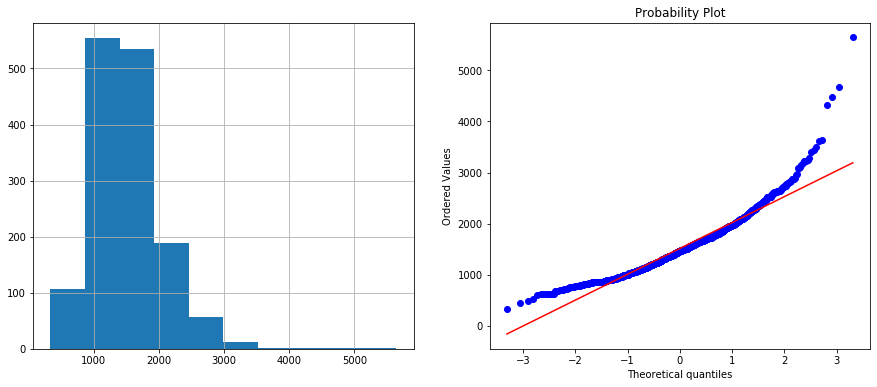

In [5]:
diagnostic_plots(data, 'GrLivArea')

## LogTransformer

In [6]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

LogTransformer(variables=['LotArea', 'GrLivArea'])

In [7]:
# variables q serán transformadas
lt.variables

['LotArea', 'GrLivArea']

In [8]:
data_tf = lt.transform(data)

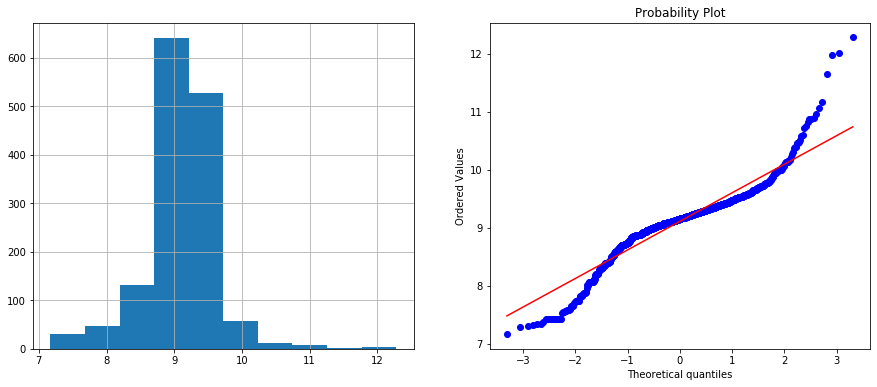

In [9]:
diagnostic_plots(data_tf, 'LotArea')

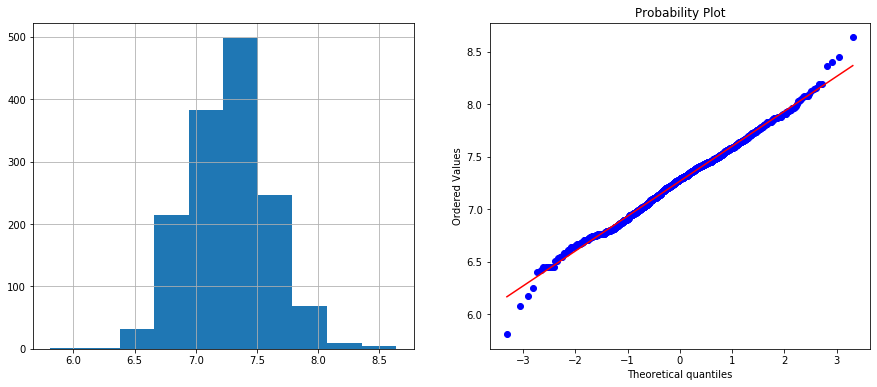

In [10]:
# variables transformadas
diagnostic_plots(data_tf, 'GrLivArea')

## ReciprocalTransformer

In [11]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [12]:
data_tf = rt.transform(data)

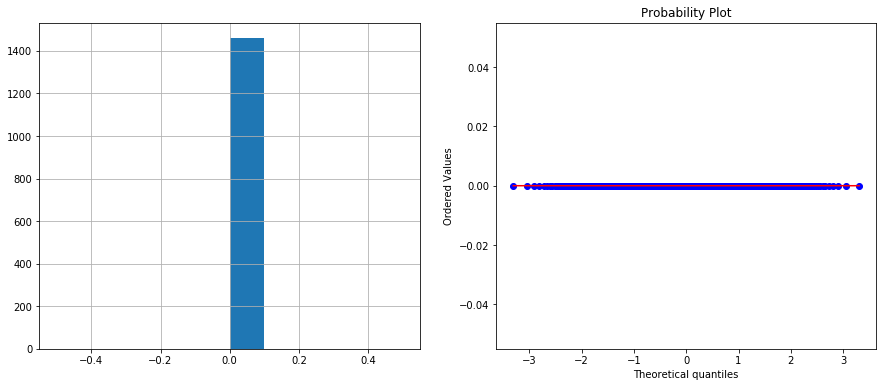

In [13]:
diagnostic_plots(data_tf, 'LotArea')

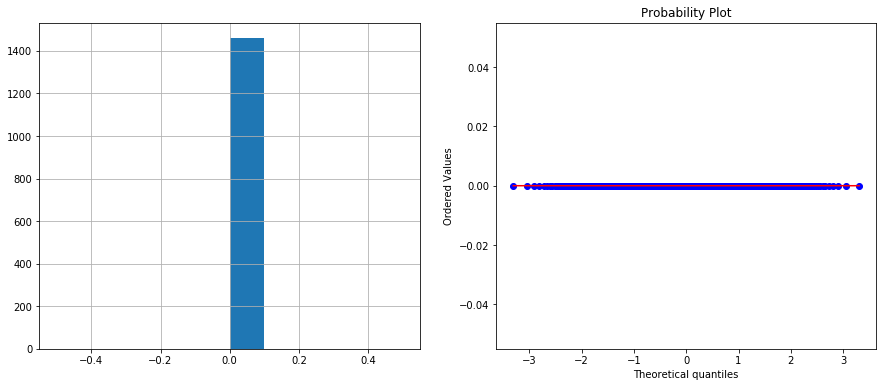

In [14]:
# variable transformada
diagnostic_plots(data_tf, 'GrLivArea')

## ExponentialTransformer

In [15]:
et = vt.PowerTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

PowerTransformer(exp=0.5, variables=['LotArea', 'GrLivArea'])

In [16]:
data_tf = et.transform(data)

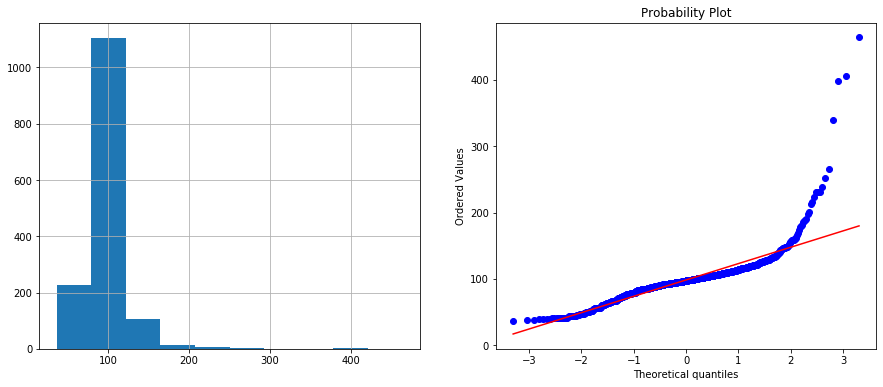

In [17]:
diagnostic_plots(data_tf, 'LotArea')

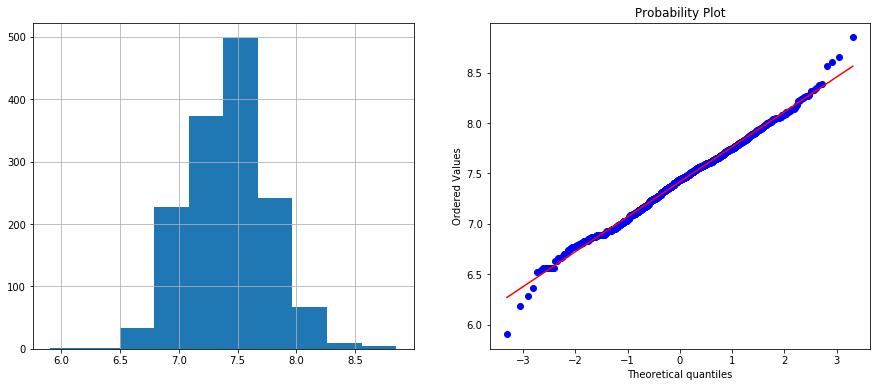

In [32]:
# variables transformadas
diagnostic_plots(data_tf, 'GrLivArea')

## BoxCoxTransformer

In [19]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [21]:
# estos son los exponentes para la transformación BoxCox
bct.lambda_dict_

{'LotArea': 0.03094631071248529, 'GrLivArea': 0.006304810832611781}

In [22]:
data_tf = bct.transform(data)

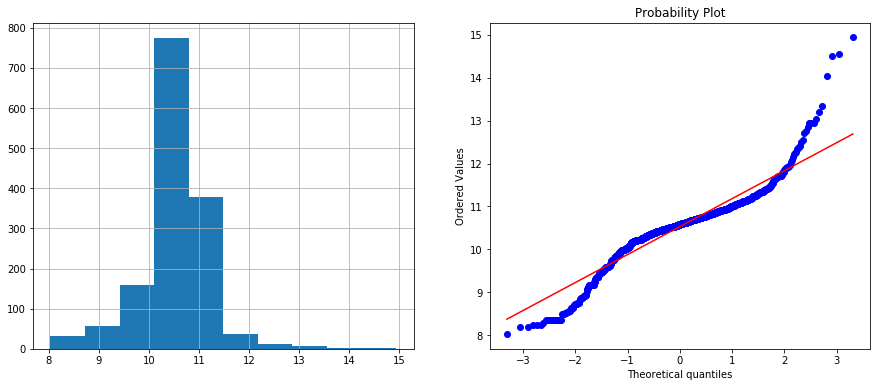

In [23]:
diagnostic_plots(data_tf, 'LotArea')

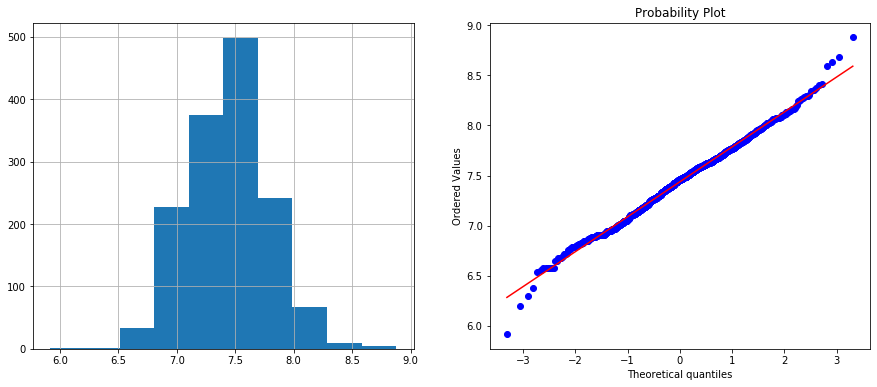

In [24]:
# variables transformadas
diagnostic_plots(data_tf, 'GrLivArea')

## Yeo-Johnson Transformer

Yeo-Johnson Transformer will be available in the next release of Feauture-Engine!!!

In [25]:
yjt = vt.YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])
yjt.fit(data)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

In [28]:
# estos son los exponentes para la transformación Yeo-Johnson
yjt.lambda_dict_

{'LotArea': 0.03081854079393649, 'GrLivArea': 0.005539641278705955}

In [29]:
data_tf = yjt.transform(data)

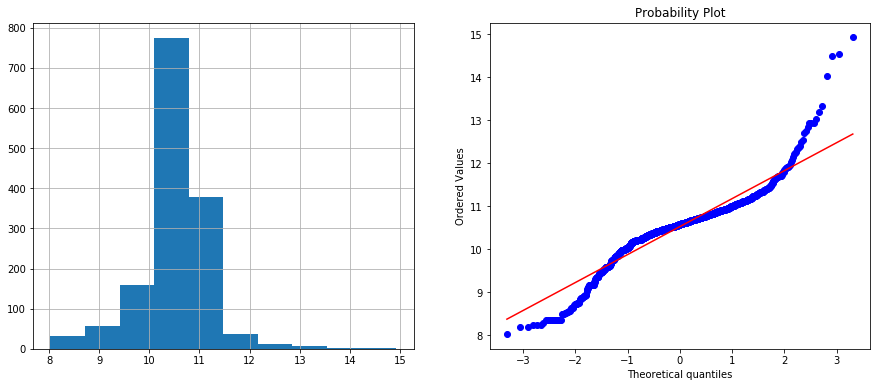

In [30]:
diagnostic_plots(data_tf, 'LotArea')

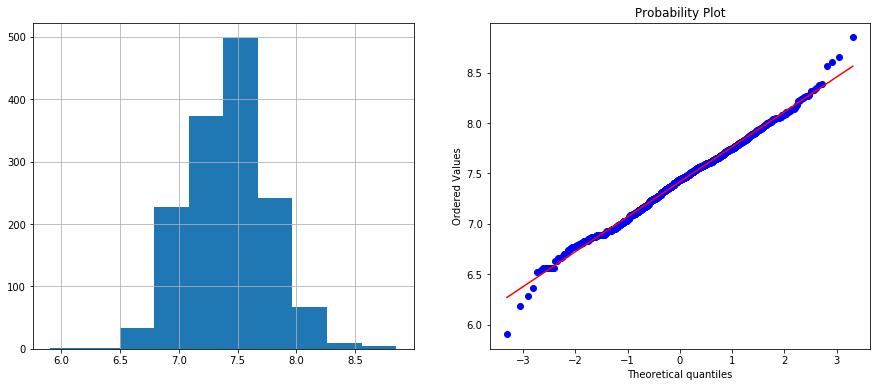

In [31]:
# variables transformadas
diagnostic_plots(data_tf, 'GrLivArea')